# Load Online Retail Data to Google Cloud Storage


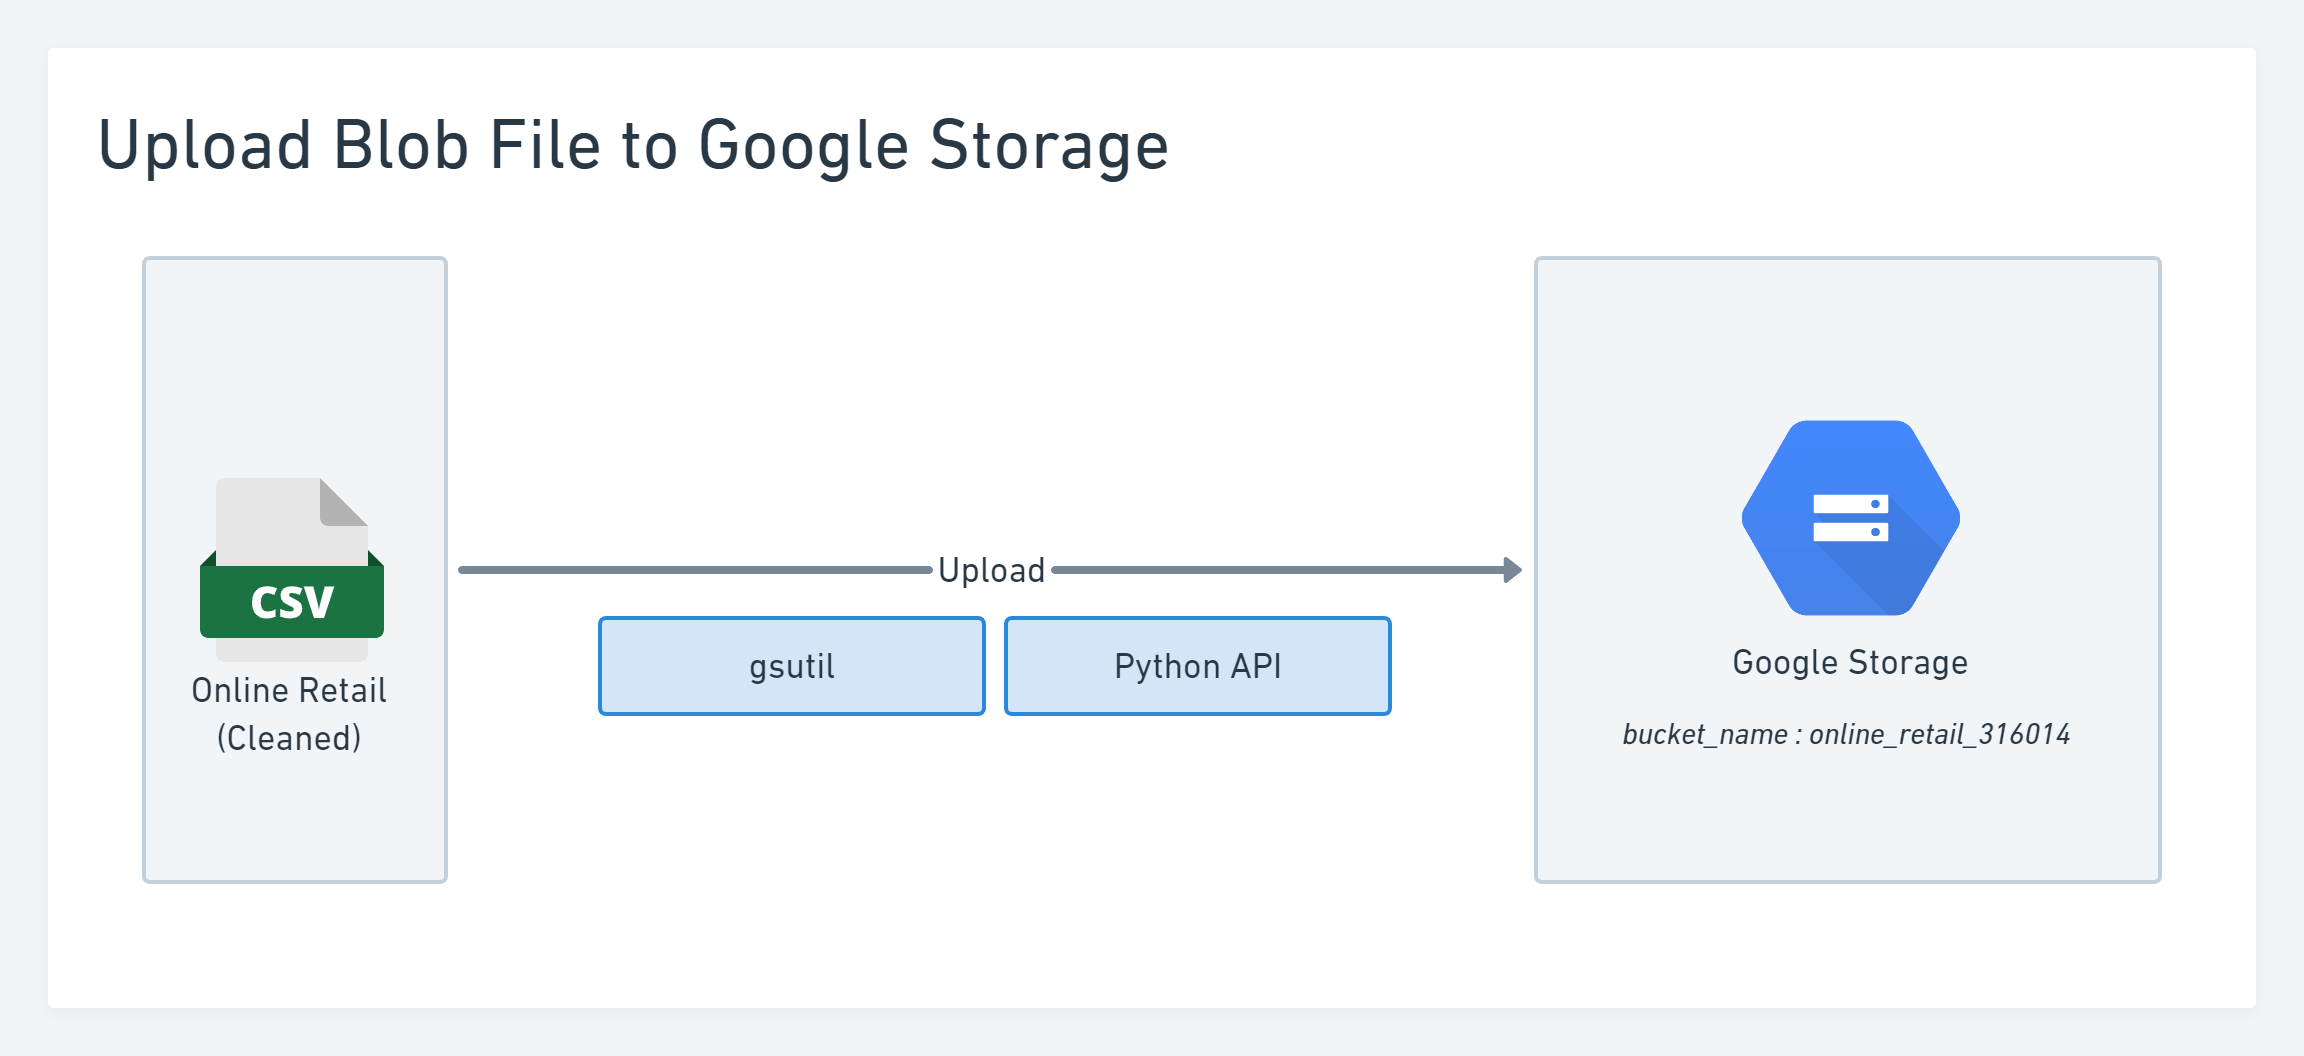

In [1]:
from google.colab import auth
auth.authenticate_user()

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = ''
!gcloud config set project {project_id}

Updated property [core/project].


To take a quick anonymous survey, run:
  $ gcloud survey



# Load Online Retails Data (Cleaned Version) with gsutil command

In [7]:
#download cleaned data from google drive
!gdown --id 1Yc-2Nt6NITQtQb7E2XQJwbtINybwOtnb

Downloading...
From: https://drive.google.com/uc?id=1Yc-2Nt6NITQtQb7E2XQJwbtINybwOtnb
To: /content/online_retail_cleaned.csv
100% 50.1M/50.1M [00:01<00:00, 28.3MB/s]


In [9]:
# Define bucket name 
# For This Example bucket name is online_retail_316014
bucket_name = 'online_retail_316014'

# Copy the file to bucket.
!gsutil cp /content/online_retail_cleaned.csv gs://{bucket_name}/


Copying file:///content/online_retail_cleaned.csv [Content-Type=text/csv]...
- [1 files][ 47.7 MiB/ 47.7 MiB]                                                
Operation completed over 1 objects/47.7 MiB.                                     


Complete upload file to online_retail_316014 bucket.

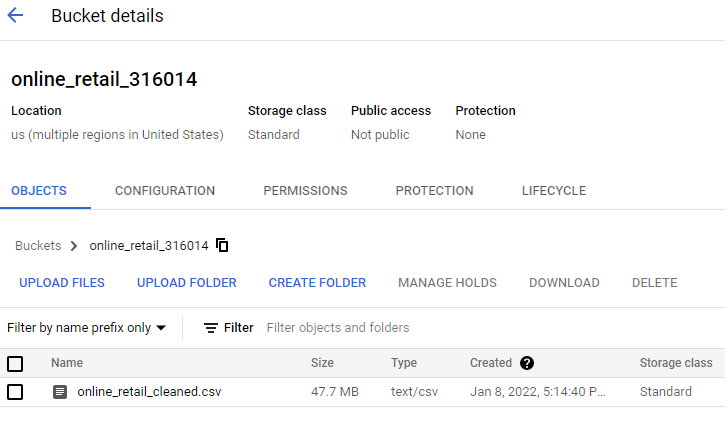

# Load Data with Python

## Load Online Retails Data (Cleaned Version) with GoogleAPIClient

In [24]:
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')

In [31]:
from googleapiclient.http import MediaFileUpload
#Create media file for upload 
media = MediaFileUpload('/content/online_retail_cleaned.csv', 
                        mimetype='text/csv',
                        resumable=True)
#Request insert to bucket
request = gcs_service.objects().insert(bucket=bucket_name, 
                                       name='online_retail_cleaned_from_python.csv',
                                       media_body=media)
response = None
while response is None:
  _, response = request.next_chunk()
print('Upload complete')

Upload complete


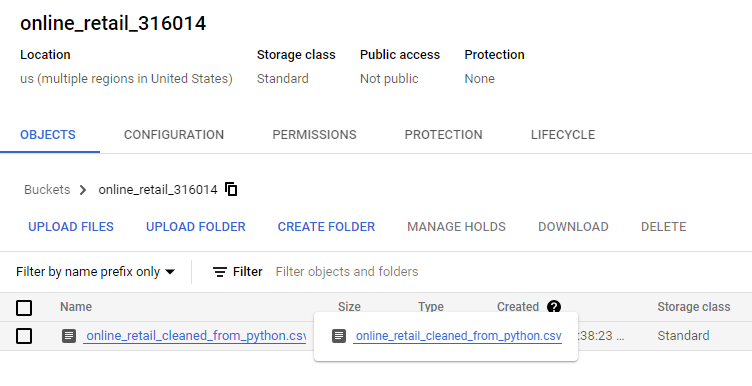

## Load Online Retails Data (Cleaned Version) with Python Storage API

In [43]:
from google.cloud import storage
def upload_file_to_gcs(project_id, bucket_name, source_file_name, destination_blob_name):
    # Create storage client
    storage_client = storage.Client(project=project_id)
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)
    #Upload blob file to storage
    blob.upload_from_filename(source_file_name)
    print(
        "File {} uploaded to {}.".format(
            source_file_name, destination_blob_name
        )
    )

In [45]:
upload_file_to_gcs(project_id, 'online_retail_316014', '/content/online_retail_cleaned.csv', 'online_retail_cleaned_python_storage_api.csv')

File /content/online_retail_cleaned.csv uploaded to online_retail_cleaned_python_storage_api.csv.


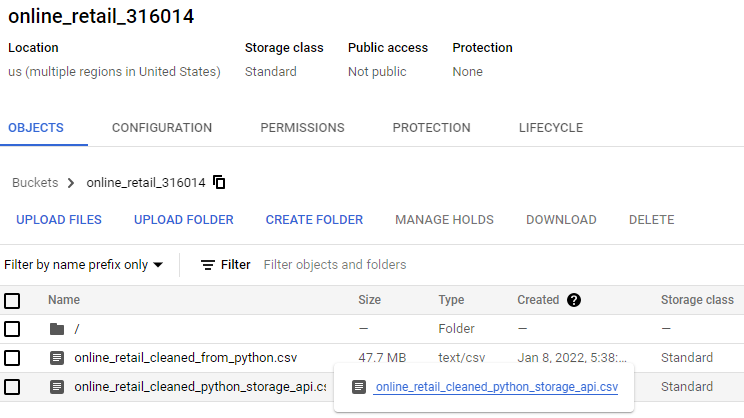